In [16]:
# !pip install matplotlib
import os
import sys
import matplotlib
matplotlib.use('Agg') 
import matplotlib.pyplot as plt
import matplotlib as mpl
import matplotlib.cm as cm
from matplotlib.colors import ListedColormap, LinearSegmentedColormap
mpl.rcParams.update({'figure.dpi':150})
import numpy as np
from torch.utils.data import DataLoader
import torch
# Draw point cloud
# Point cloud IO
from data import ModelNet40
import numpy as np
import sys
sys.path.append('/home/user_tp/workspace/code/attack/ModelNet40-C/PCT_Pytorch/') 
# BASE_DIR = os.path.dirname(os.path.abspath(__file__))
# sys.path.append(BASE_DIR)
# sys.path.append(os.path.abspath(os.path.join(os.path.dirname(__file__), '..', 'PCT_Pytorch')))
from sampling import weighted_random_point_sample
# from interpolation import Interpolation,knn
from pc_util import pyplot_draw_point_cloud,draw_mn

para

In [15]:
device = torch.device("cuda")
step_size = 0.03
# draw_mn(args, device, step_size, i)#干净数据集

In [18]:
data,_ = ModelNet40(1024)
print("data:",data.shape)

ValueError: need at least one array to concatenate

pointcloud-c loader

In [10]:
sev='scale'
data_path = "/home/user_tp/workspace/data/modelnet_c/"
data_root = f"{data_path}{sev}_2.h5"#pcc
point_set_p, label = load_data_h5(data_root)

NameError: name 'load_data_h5' is not defined

modelnet40-C loader

In [11]:

sev='uniform'
data_path = "/home/user_tp/workspace/data/ModelNet40-C/"
data_root = f"{data_path}data_{sev}_5.npy"
point_set_m = np.load(data_root, allow_pickle=True)
    

dataset and path seting

In [ ]:
n=1919
point = point_set_p[n]#mnc or pcc
print("point:",point.shape)
npoint = point.shape[0]
points = torch.from_numpy(point).to(device).to(torch.float32)#[N,3]
N,C = points.shape
# points = points.detach().cpu().numpy()
I = Interpolation(step_size)

no trans, just origin

颜色映射
viridis,plasma,inferno,magma,cividis,coolwarm,spring,summer,autumn,winter
cool,hot,pink,copper,bone

/tmp/ipykernel_39353/2799250157.py:1: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap(obj)`` instead.
  viridis8 = cm.get_cmap('viridis', 8)


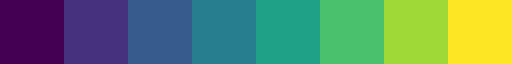

In [146]:
viridis8 = cm.get_cmap('viridis', 8)
viridis8

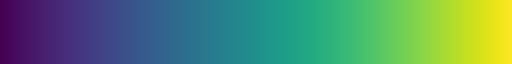

In [149]:
cm.viridis

pts_p: torch.Size([1024, 3])


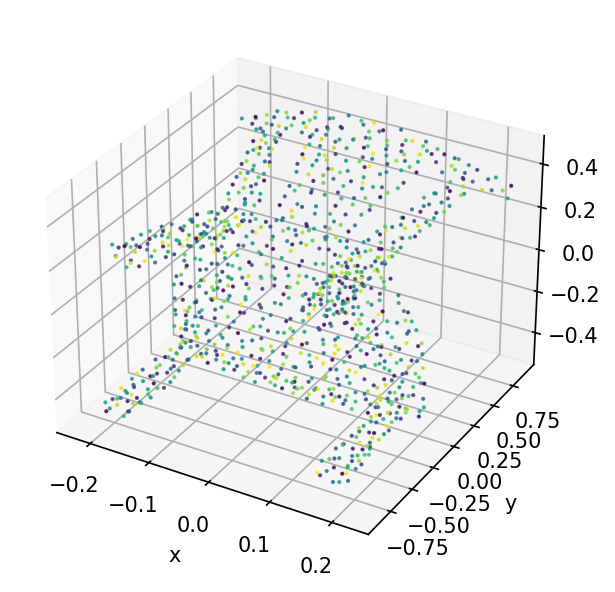

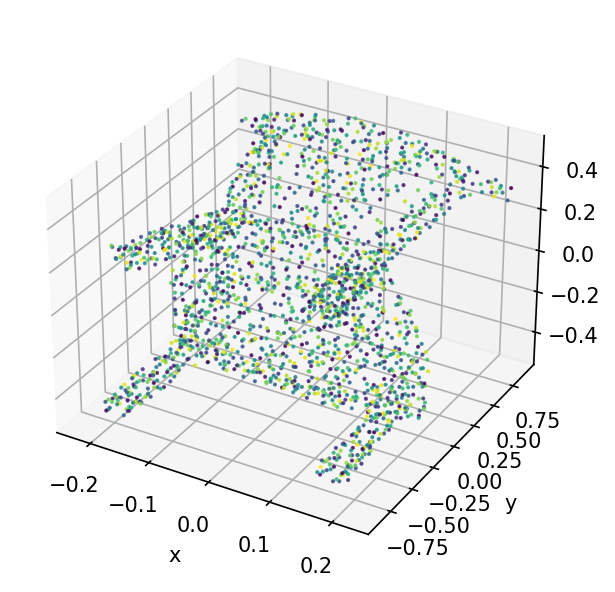

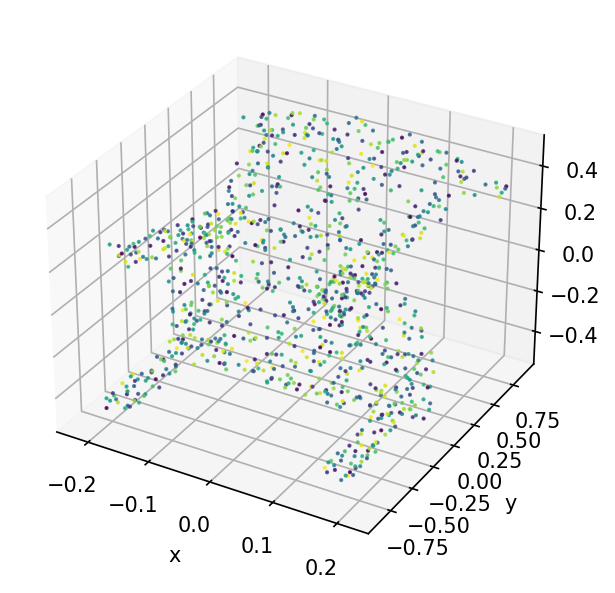

In [151]:
###origin
normals = I.get_normal_vector(points.unsqueeze(0)).squeeze(0)#[N,3] dtype torch.float32
# pts_p = I.shape_invariant_perturb(points.unsqueeze(0), normals.unsqueeze(0)).squeeze(0)
_, idx = knn(points.unsqueeze(0), k=20)
pts_p = I.random_k_neighbors_shape_invariant_perturb(points.unsqueeze(0), idx, normals.unsqueeze(0)).squeeze(0)
print("pts_p:",pts_p.shape)
# pts = pts.detach().cpu().numpy()
pts = torch.cat((points,pts_p),dim=0).detach().cpu().numpy()
pts_p = pts_p.detach().cpu().numpy()

pyplot_draw_point_cloud(point)
pyplot_draw_point_cloud(pts)
pyplot_draw_point_cloud(pts_p)
# pyplot_draw_point_cloud(point, f"{save_plt}origin_1024_{step_size}_{m}")
# pyplot_draw_point_cloud(pts, f"{save_plt}ro_2048_{step_size}_{m}")
# pyplot_draw_point_cloud(pts_p, f"{save_plt}orperb_1024_{step_size}_{m}")


wrs sample #replacement=false

In [ ]:

centroids_f,idx = weighted_random_point_sample(points.unsqueeze(0), npoint, k=20) #(B,N)
new_data_f = torch.gather(points.unsqueeze(0), 1, centroids_f.unsqueeze(-1).expand(1, npoint, C)).squeeze(0)
print("new_data:",new_data_f.shape)
normals_f = I.get_normal_vector(new_data_f.unsqueeze(0)).squeeze(0)
data_f = I.shape_invariant_perturb(new_data_f.unsqueeze(0), normals_f.unsqueeze(0)).squeeze(0)
pts_f = torch.cat((points,data_f),dim=0).detach().cpu().numpy()
ndata_f = new_data_f.detach().cpu().numpy()
#plt
pyplot_draw_point_cloud(ndata_f)
pyplot_draw_point_cloud(pts_f)


wrs #replacement = true

In [ ]:
centroids = torch.zeros(1, npoint, dtype=torch.long)#.to(device)
centroids_r,_ = weighted_random_point_sample(points.unsqueeze(0), npoint, k=20,replace=True) #(B,N)
new_data_r = torch.gather(points.unsqueeze(0), 1, centroids_r.unsqueeze(-1).expand(1, npoint, C)).squeeze(0)
print("new_data:",new_data_r.shape)
normals_r = I.get_normal_vector(new_data_r.unsqueeze(0)).squeeze(0)
# data_r = I.shape_invariant_perturb(new_data_r.unsqueeze(0), normals_r.unsqueeze(0)).squeeze(0)
_, idx = knn(points.unsqueeze(0), k=20)
data_r = I.random_k_neighbors_shape_invariant_perturb(points.unsqueeze(0), idx, normals_r.unsqueeze(0)).squeeze(0) 
pts_r = torch.cat((points,data_r),dim=0).detach().cpu().numpy()
ndata_r = new_data_r.detach().cpu().numpy()
data_r = data_r.detach().cpu().numpy()

pyplot_draw_point_cloud(ndata_r)
pyplot_draw_point_cloud(pts_r)
pyplot_draw_point_cloud(data_r)